# 羅吉斯迴歸

最終結果：

train score=0.87

test score=0.77

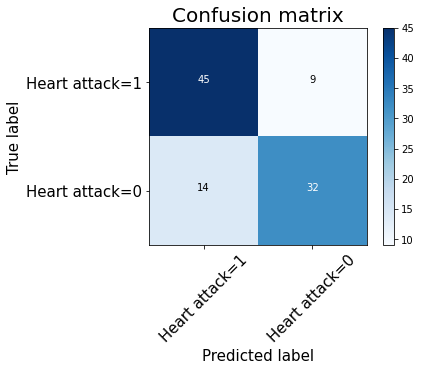


【Heart Attack Analysis & Prediction Dataset】
URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

# 導入資料

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [68]:
data=pd.read_csv('heart.csv')

In [69]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 以age進行羅吉斯迴歸

In [46]:
#使用單一變數預測自變數
X=data['age'].values
y=data['output'].values

In [47]:
X.shape

(303,)

In [48]:
X=X.reshape(-1,1)

In [49]:
X.shape

(303, 1)

In [50]:
y.shape

(303,)

In [51]:
model=linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [52]:
print('coef', model.coef_)
print('intercept',model.intercept_)
w1=float(model.coef_)
w0=float(model.intercept_)

coef [[-0.05234096]]
intercept [3.03564679]


In [53]:
def sigmoid(x,wo,w1):
    ln_odds=wo+w1*x
    return 1/(1+np.exp(-ln_odds))

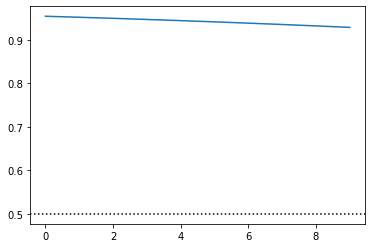

In [54]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')

In [55]:
model.predict_proba(X)

array([[0.56508692, 0.43491308],
       [0.24992141, 0.75007859],
       [0.29117842, 0.70882158],
       [0.47388546, 0.52611454],
       [0.48694988, 0.51305012],
       [0.48694988, 0.51305012],
       [0.47388546, 0.52611454],
       [0.32461462, 0.67538538],
       [0.4221589 , 0.5778411 ],
       [0.48694988, 0.51305012],
       [0.4478812 , 0.5521188 ],
       [0.37208536, 0.62791464],
       [0.38439378, 0.61560622],
       [0.57790384, 0.42209616],
       [0.50003215, 0.49996785],
       [0.39685204, 0.60314796],
       [0.50003215, 0.49996785],
       [0.60320953, 0.39679047],
       [0.31324634, 0.68675366],
       [0.64011864, 0.35988136],
       [0.51311438, 0.48688562],
       [0.32461462, 0.67538538],
       [0.30209811, 0.69790189],
       [0.53920721, 0.46079279],
       [0.2804948 , 0.7195052 ],
       [0.6638639 , 0.3361361 ],
       [0.51311438, 0.48688562],
       [0.40944551, 0.59055449],
       [0.59061668, 0.40938332],
       [0.43497629, 0.56502371],
       [0.

In [56]:
model.score(X,y) #以age預測output成果不準確

0.6204620462046204

# 以cp(胸腔疼痛程度)進行羅吉斯迴歸

In [57]:
#使用單一變數預測自變數
X_cp=data['cp'].values
y=data['output'].values


In [58]:
X_cp=X_cp.reshape(-1,1)

In [59]:
model=linear_model.LogisticRegression()
model.fit(X_cp,y)

LogisticRegression()

In [60]:
print('coef', model.coef_)
print('intercept',model.intercept_)
w1=float(model.coef_)
w0=float(model.intercept_)

coef [[0.96547181]]
intercept [-0.68013802]


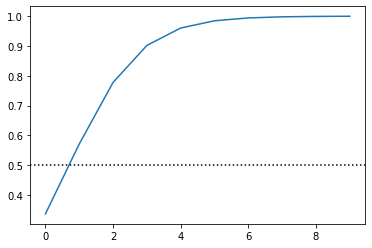

In [61]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')

In [62]:
model.predict_proba(X_cp)

array([[0.09829826, 0.90170174],
       [0.22256072, 0.77743928],
       [0.42914661, 0.57085339],
       [0.42914661, 0.57085339],
       [0.6637695 , 0.3362305 ],
       [0.6637695 , 0.3362305 ],
       [0.42914661, 0.57085339],
       [0.42914661, 0.57085339],
       [0.22256072, 0.77743928],
       [0.22256072, 0.77743928],
       [0.6637695 , 0.3362305 ],
       [0.22256072, 0.77743928],
       [0.42914661, 0.57085339],
       [0.09829826, 0.90170174],
       [0.09829826, 0.90170174],
       [0.22256072, 0.77743928],
       [0.22256072, 0.77743928],
       [0.09829826, 0.90170174],
       [0.6637695 , 0.3362305 ],
       [0.09829826, 0.90170174],
       [0.6637695 , 0.3362305 ],
       [0.22256072, 0.77743928],
       [0.6637695 , 0.3362305 ],
       [0.22256072, 0.77743928],
       [0.09829826, 0.90170174],
       [0.42914661, 0.57085339],
       [0.22256072, 0.77743928],
       [0.22256072, 0.77743928],
       [0.22256072, 0.77743928],
       [0.22256072, 0.77743928],
       [0.

In [63]:
model.score(X_cp,y) #以cp預測output成果稍有提升

0.759075907590759

# 嘗試多元分類

In [70]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)

for train_index, test_index in split.split(data, data['output']):
    train_set=data.loc[train_index]
    test_set=data.loc[test_index]


In [71]:
train_set_y=train_set['output']
train_set_X=train_set.drop('output',axis=1)
test_set_y=test_set['output']
test_set_X=test_set.drop('output',axis=1)

In [72]:
model=linear_model.LogisticRegression()

In [73]:
model.fit(train_set_X,train_set_y)

C:\anaconda3\envs\tf37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [75]:
model.predict(test_set_X)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [76]:
model.predict_proba(test_set_X)

array([[0.93808656, 0.06191344],
       [0.95869557, 0.04130443],
       [0.06023885, 0.93976115],
       [0.0469464 , 0.9530536 ],
       [0.93202896, 0.06797104],
       [0.36456909, 0.63543091],
       [0.01090629, 0.98909371],
       [0.09885392, 0.90114608],
       [0.04994327, 0.95005673],
       [0.65041249, 0.34958751],
       [0.96157722, 0.03842278],
       [0.11013251, 0.88986749],
       [0.02512484, 0.97487516],
       [0.02586273, 0.97413727],
       [0.12299332, 0.87700668],
       [0.97614087, 0.02385913],
       [0.53995546, 0.46004454],
       [0.01636869, 0.98363131],
       [0.04713304, 0.95286696],
       [0.92239127, 0.07760873],
       [0.82150252, 0.17849748],
       [0.03734897, 0.96265103],
       [0.90567729, 0.09432271],
       [0.19262493, 0.80737507],
       [0.98929301, 0.01070699],
       [0.03868683, 0.96131317],
       [0.05397656, 0.94602344],
       [0.06457395, 0.93542605],
       [0.08137934, 0.91862066],
       [0.32048921, 0.67951079],
       [0.

In [77]:
model.score(train_set_X,train_set_y)

0.8719211822660099

In [78]:
model.score(test_set_X,test_set_y)

0.77

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

Confusion matrix, without normalization
[[45  9]
 [14 32]]


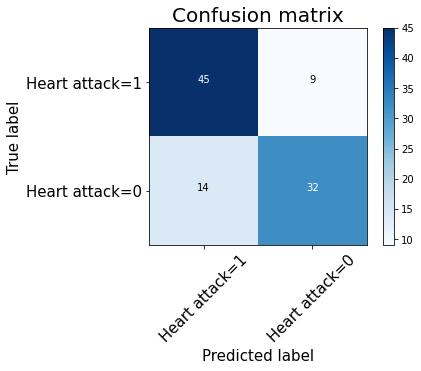

In [81]:

cnf_matrix_LR = confusion_matrix(test_set_y,model.predict(test_set_X), labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['Heart attack=1','Heart attack=0'],normalize= False,  title='Confusion matrix')